# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Data Cleaning and Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')

In [3]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [4]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


# Data Splitting

In [6]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [7]:
colnames = X.columns

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# Feature Selection

# Filter Method

# 1.Chi-2

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
# configure to select all features
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x00000211594739D0>)

In [11]:
ranks["chi2"] = ranking(np.abs(chi_selector.scores_), colnames)
print('finished')

finished


# 2.ANOVA f-test Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [13]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [14]:
ranks["ANOVA"] = ranking(np.abs(fs.scores_), colnames)
print('finished')

finished


# 3.Information Gain

In [15]:
from sklearn.feature_selection import mutual_info_classif

In [16]:
# configure to select all features
mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
mutual_info.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x00000211593EFEE0>)

In [17]:
ranks["info"] = ranking(np.abs(mutual_info.scores_), colnames)
print('finished')

finished


# Linear Model Feature Ranking

# Embedded Method Feature Selection

# 1.CART Feature Importance

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model_cart = DecisionTreeClassifier()

In [20]:
model_cart.fit(X, y)

DecisionTreeClassifier()

In [21]:
ranks["CART"] = ranking(np.abs(model_cart.feature_importances_), colnames)
print('finished')

finished


# 2.Random Forest Classification Feature Importance

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)

RandomForestClassifier()

In [24]:
ranks["RF"] = ranking(np.abs(model_rf.feature_importances_), colnames)
print('finished')

finished


# 3.XGBoost Feature Importance

In [25]:
from xgboost import XGBClassifier

In [26]:
model_xgb = XGBClassifier()
model_xgb.fit(X, y)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [27]:
ranks["xgb"] = ranking(np.abs(model_xgb.feature_importances_), colnames)
print('finished')

finished


# Wrapper Method

# 1.Recursive Feature Elimination with Cross Validation (Random Forrest)

# 2. Recursive Feature Elimination (RFE-SVM)

# 3. Boruta Feature Selection

# Result : Creating the Feature Ranking Matrix

In [28]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	ANOVA	CART	RF	chi2	info	xgb	Mean
Emg1	0.33	0.25	0.48	0.41	0.46	0.01	0.32
Emg2	0.36	0.23	0.8	0.58	0.85	0.22	0.51
Emg3	1.0	1.0	1.0	1.0	1.0	1.0	1.0
Emg4	0.45	0.07	0.3	0.47	0.45	0.04	0.3
Emg5	0.45	0.0	0.0	0.01	0.0	0.0	0.08
Emg6	0.02	0.01	0.1	0.0	0.14	0.0	0.05
Emg7	0.48	0.35	0.95	0.83	0.98	0.1	0.62
Emg8	0.53	0.31	0.83	0.44	0.74	0.01	0.48
Emg9	0.0	0.17	0.4	0.15	0.63	0.02	0.23
Emg10	0.05	0.27	0.67	0.11	0.13	0.06	0.21


# Visualization

In [29]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nafem\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


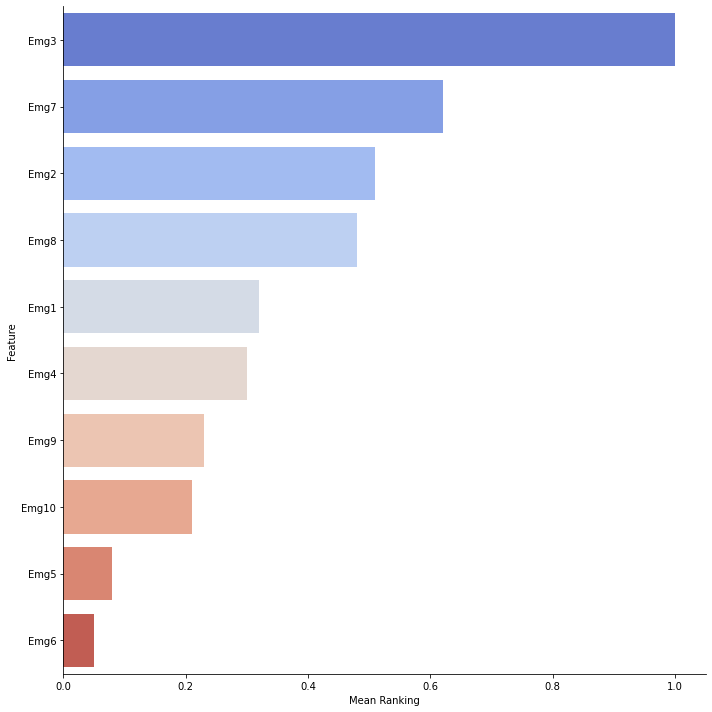

In [30]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=10, aspect=1, palette='coolwarm')